# Let's plot the amplitude spectrum (which was extracted with PERIOD04) and highlight the significant delta-Scuti pulsations

In [123]:
import numpy as np
import matplotlib.pyplot as plt

import os

import lightkurve as lk

In [124]:
datadir = os.getcwd()

datafile = '/betaPic_AS.fou'

freq, ampl = np.loadtxt(datadir + datafile, usecols=(0,1)).T

In [131]:
datafile1 = '/results.txt'
freqs, ampls, phs = np.loadtxt(datadir + datafile1, usecols=(0,3,5), skiprows=2).T

<Figure size 432x288 with 0 Axes>

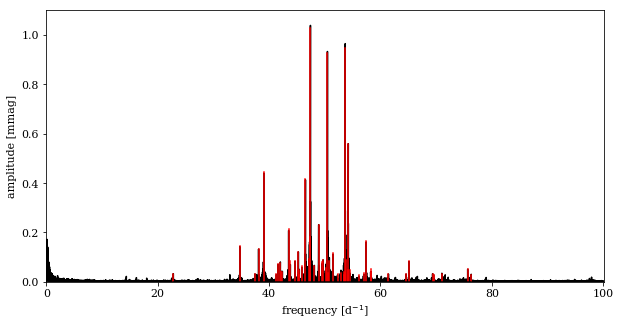

In [127]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, ampl*1000, c='k')

mask_freqs_big = freqs > 1

ax.stem(freqs[mask_freqs_big], ampls[mask_freqs_big]*1000, markerfmt=' ', basefmt='k', linefmt='r-')

#ax.setp(baseline, 'color', 'r', 'linewidth', 2)

ax.set_xlabel('frequency [d$^{-1}$]')
ax.set_ylabel('amplitude [mmag]')

ax.set_xlim(-0.1, 100.1)
ax.set_ylim(-0.001, 1.1)

plt.show()

#fig.savefig('betaPic_as.pdf', bbox_inches='tight')

In [128]:
# Produce a txt file with a complete list of frequencies, amplitudes, magnitudes and SNRs

# Flist = []

# for i in range(1, len(freqs[mask_freqs_big])+1):
#     tmp = 'F{0}'.format(i)
#     Flist.append(tmp)
    
# compl_list = []
# for i in range(len(freqs[mask_freqs_big])):
#     compl_list.append([Flist[i], freqs[mask_freqs_big][i], ampls[mask_freqs_big][i], phs[mask_freqs_big][i]/(2*np.pi)])
    
#datapairs = np.stack((Flist, freqs[mask_freqs_big], ampls[mask_freqs_big], phs[mask_freqs_big]/(2*np.pi)), axis=-1)
#np.savetxt('complete_list.txt',datapairs, fmt="%s")

# Let's make a plot of a zoom into the light curve together with the frequency fit + Prewhitening (residuals) of the lc

In [132]:
datadir = os.getcwd()
datafile = '/period04_freqs.per'

freqs, ampls, phs = np.loadtxt(datadir + datafile, usecols=(1, 2, 3)).T

In [133]:
lc=lk.search_lightcurvefile('beta Pictoris', sector=6).download()

In [134]:
t=lc.time
f=lc.PDCSAP_FLUX.normalize().flux

In [135]:
x = np.linspace(1472, 1473, 5000)
y = []

for i in x:
    tmp = [] #saves one sine
    for freq, ampl, ph in zip(freqs, ampls, phs):
        tmp.append(1000 * ampl * np.sin(2 * np.pi * freq * i + ph * 2 * np.pi))
    y.append(sum(tmp))
y = np.array(y)

In [137]:
y_fit = []

for i in t:
    tmp = [] #saves one sine
    for freq, ampl, ph in zip(freqs, ampls, phs):
        tmp.append(1000 * ampl * np.sin(2 * np.pi * freq * i + ph * 2 * np.pi))
    y_fit.append(sum(tmp))
y_fit = np.array(y_fit)

In [138]:
y_res = -2.5*np.log10(f) * 1000 - y_fit

Text(0, 0.5, 'residuals')

<Figure size 432x288 with 0 Axes>

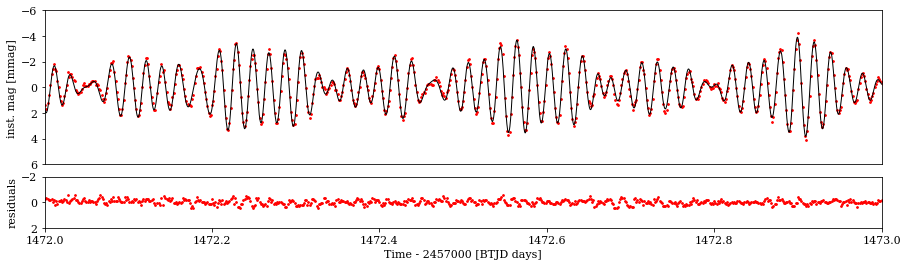

In [139]:
plt.rc('font', family='serif', size=11)
plt.tight_layout()

fig, ax = plt.subplots(2, 1, figsize=(15, 4), gridspec_kw = {'height_ratios':[3, 1]})

ax[0].plot(x,y, c='k', linewidth=1)
ax[0].scatter(t, -2.5*np.log10(f) * 1000, s=3, c='r')

ax[1].scatter(t, y_res, s=3, c='r')

ax[0].set_ylim(-6, 6)
ax[0].invert_yaxis()

#plt.axis('equal')

ax[0].set_xlim(1472, 1473)
ax[1].set_xlim(1472, 1473)

ax[1].set_xlabel('Time - 2457000 [BTJD days]')
ax[0].set_ylabel('inst. mag [mmag]')

ax[1].set_ylim(2,-2)

ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.subplots_adjust(hspace=0.12)

ax[1].set_ylabel('residuals')

#fig.savefig('betaPic_puls_zoom.pdf', bbox_inches='tight')

## Make a Table of all Frequencies, Ampl., Errors & SNR incl. the uncertainties for the paper

In [141]:
datadir = os.getcwd()
datafile_err = '/period04_freqs_err.per'

freqs_err, ampls_err, phs_err = np.loadtxt(datadir + datafile_err, usecols=(0,1,2)).T

#np.savetxt('F_table.txt',['F{0}'.format(i) for i in range(1,55)], fmt="%s")

In [142]:
from uncertainties import ufloat
from uncertainties import ufloat_fromstr


def uncert(values, errors):
    numbers = []
    if type(values)==np.float64:
        values = [values]
        
    if type(errors)==np.float64:
        errors = [errors]
        
    for i in range(0, len(values)):
        tmp=ufloat(values[i], errors[i])
        if str(errors[i]).replace(".", "").replace("0", "")[0] == '1':
            numbers.append('{:.2uS}'.format(tmp))
        else:
            numbers.append('{:.1uS}'.format(tmp))            
    return numbers

In [143]:
freqs_table = [uncert(freqs[i], freqs_err[i])[0] for i in range(0, 54)]
ampls_table = [uncert(ampls[i]*1000, ampls_err[i]*1000)[0] for i in range(0, 54)]
phs_table = [uncert(phs[i], phs_err[i])[0] for i in range(0, 54)]

Export it

In [144]:
#datapairs=np.stack((freqs_table, ampls_table, phs_table), axis=-1)
#np.savetxt('freqs_table.txt',datapairs, fmt="%s")